In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np

In [2]:
# Define the stock tickers and the date range for data extraction
tickers = ['AAPL', 'MSFT', 'JNJ', 'JPM', 'PG', 'XOM', 'NVDA', 'PFE', 'KO', 'TSLA']
start_date = '2013-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')  # Today's date

In [3]:
# Extract historical stock data from Yahoo Finance for each ticker
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
# Display the first few rows of the extracted data for each ticker
for ticker in tickers:
    print(f"\nData for {ticker}:")
    print(stock_data[ticker].head())


Data for AAPL:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725040  560518000
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513922  352965200
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053947  594333600
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959504  484156400
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002457  458707200

Data for MSFT:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-01-02  27.250000  27.730000  27.150000  27.620001  22.492283  52899300
2013-01-03  27.629999  27.650000  27.160000  27.250000  22.190969  48294400
2013-01-04  27.270000  27.340000  26.730000  26.740000  21.775656  52521100
2013-01-07  26.770000  26.879999  26.639999  26.6

In [5]:
# Combine all stock data into a single DataFrame
combined_data = pd.concat(stock_data, axis=1, keys=tickers)

In [6]:
# Combine all stock data into a single DataFrame
combined_data = pd.concat(stock_data, axis=1, keys=tickers)

In [7]:
# Display the combined data structure
print(combined_data.head())

                 AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725040  560518000   
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513922  352965200   
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053947  594333600   
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959504  484156400   
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002457  458707200   

                 MSFT                                   ...         KO  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2013-01-02  27.250000  27.730000  27.150000  27.620001  ...  36.660000   
2013-01-03  27.629999  27.650000  27.160000  27.250000  ...  37

In [8]:
# Check for missing values
missing_values = combined_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 AAPL  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
MSFT  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
JNJ   Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
JPM   Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
PG    Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
XOM   Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
NVDA  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
PFE   Open         0
      High         0
      Low          0
      Close        0
  

In [9]:
# Display the first few rows of the cleaned data
combined_data.head()

AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725040  560518000   
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513922  352965200   
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053947  594333600   
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959504  484156400   
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002457  458707200   

                 MSFT                                   ...         KO  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2013-01-02  27.250000  27.730000  27.150000  27.620001  ...  36.660000   
2013-01-03  27.629999  27.650000  27.160000  27.250000  ...  37.110001   
2013-01-04  27.270000  27.340000  26.730000  26.740000  ...  37.520000   
2013-01-07  26.770000  26.879999  26.639999  26.690001  ...  37.099998   
2013-01-08  26.750000  26.790001  26.459999  26.549999  ...  36.910000   

                                                TSLA                      \
                Close  Adj Close    Volume      Open      High       Low   
Date                                                                       
2013-01-02  37.599998  26.194849  21872400  2.333333  2.363333  2.314000   
2013-01-03  37.599998  26.194849  16357900  2.345333  2.363333  2.316667   
2013-01-04  37.660000  26.236658  15311300  2.320000  2.320000  2.261333   
2013-01-07  37.299999  25.985855  14610200  2.320000  2.320000  2.260000   
2013-01-08  37.040001  25.804722  14324300  2.300000  2.300000  2.207333   

                                          
               Close Adj Close    Volume  
Date                                      
2013-01-02  2.357333  2.357333  17922000  
2013-01-03  2.318000  2.318000  11130000  
2013-01-04  2.293333  2.293333  10110000  
2013-01-07  2.289333  2.289333   6630000  
2013-01-08  2.245333  2.245333  19260000  

[5 rows x 60 columns]

# LR, SVM, XGB Model

In [10]:
# Flatten the MultiIndex columns by joining with underscores but avoiding extra underscores
combined_data.columns = [f"{ticker}_{attr}" for ticker, attr in combined_data.columns]

combined_data.head()

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,...,KO_Low,KO_Close,KO_Adj Close,KO_Volume,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Adj Close,TSLA_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.725040,560518000,27.250000,27.730000,27.150000,27.620001,...,36.660000,37.599998,26.194849,21872400,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.513922,352965200,27.629999,27.650000,27.160000,27.250000,...,37.110001,37.599998,26.194849,16357900,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.053947,594333600,27.270000,27.340000,26.730000,26.740000,...,37.520000,37.660000,26.236658,15311300,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
2013-01-07,18.642857,18.903570,18.400000,18.710714,15.959504,484156400,26.770000,26.879999,26.639999,26.690001,...,37.099998,37.299999,25.985855,14610200,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.002457,458707200,26.750000,26.790001,26.459999,26.549999,...,36.910000,37.040001,25.804722,14324300,2.300000,2.300000,2.207333,2.245333,2.245333,19260000


In [11]:
# Custom function to calculate RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [12]:
# Function to train and evaluate models for a given stock
def train_and_evaluate(ticker, combined_data, results):
    # Extract target variable (Close price of the given ticker) and features (all other columns)
    target_column = f'{ticker}_Close'
    y = combined_data[target_column].values
    X = combined_data.drop(columns=[target_column]).values
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Dictionary to store the results
    results[ticker] = {}
    
    # Train and evaluate Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    y_pred_lr = lr_model.predict(X_test_scaled)
    lr_rmse = root_mean_squared_error(y_test, y_pred_lr)
    lr_mae = mean_absolute_error(y_test, y_pred_lr)
    lr_mape = mean_absolute_percentage_error(y_test, y_pred_lr)
    lr_r2 = r2_score(y_test, y_pred_lr)
    
    results[ticker]['Linear Regression'] = {
        'RMSE': lr_rmse,
        'MAE': lr_mae,
        'MAPE': lr_mape,
        'R2': lr_r2
    }
    
    # Train and evaluate SVM model
    svm_model = SVR(kernel='rbf')
    svm_model.fit(X_train_scaled, y_train)
    y_pred_svm = svm_model.predict(X_test_scaled)
    svm_rmse = root_mean_squared_error(y_test, y_pred_svm)
    svm_mae = mean_absolute_error(y_test, y_pred_svm)
    svm_mape = mean_absolute_percentage_error(y_test, y_pred_svm)
    svm_r2 = r2_score(y_test, y_pred_svm)
    
    results[ticker]['SVM'] = {
        'RMSE': svm_rmse,
        'MAE': svm_mae,
        'MAPE': svm_mape,
        'R2': svm_r2
    }
    
    # Train and evaluate XGBoost model
    xgb_model = XGBRegressor()
    xgb_model.fit(X_train_scaled, y_train)
    y_pred_xgb = xgb_model.predict(X_test_scaled)
    xgb_rmse = root_mean_squared_error(y_test, y_pred_xgb)
    xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
    xgb_mape = mean_absolute_percentage_error(y_test, y_pred_xgb)
    xgb_r2 = r2_score(y_test, y_pred_xgb)
    
    results[ticker]['XGBoost'] = {
        'RMSE': xgb_rmse,
        'MAE': xgb_mae,
        'MAPE': xgb_mape,
        'R2': xgb_r2
    }
    
    # Determine the best model based on MAPE
    best_model = min(results[ticker], key=lambda model: results[ticker][model]['MAPE'])
    results[ticker]['Best Model'] = best_model

In [13]:
# Initialize a dictionary to store results for each stock
results = {}

# Train and evaluate models for each ticker
for ticker in tickers:
    print(f'\nEvaluating models for {ticker}')
    train_and_evaluate(ticker, combined_data, results)


Evaluating models for AAPL

Evaluating models for MSFT

Evaluating models for JNJ

Evaluating models for JPM

Evaluating models for PG

Evaluating models for XOM

Evaluating models for NVDA

Evaluating models for PFE

Evaluating models for KO

Evaluating models for TSLA


In [14]:
# Display the results
for ticker, metrics in results.items():
    best_model = metrics.pop('Best Model', None)
    print(f'\nResults for {ticker}:')
    for model, metric_values in metrics.items():
        print(f'  {model}:')
        for metric, value in metric_values.items():
            print(f'    {metric}: {value}')
    if best_model:
        print(f'  Best Model: {best_model} (MAPE: {results[ticker][best_model]["MAPE"]}, R2: {results[ticker][best_model]["R2"]})')


Results for AAPL:
  Linear Regression:
    RMSE: 0.16629154571501176
    MAE: 0.12708889943264437
    MAPE: 0.0033445029769157844
    R2: 0.9999920603121815
  SVM:
    RMSE: 11.72906447040473
    MAE: 5.84995660259605
    MAPE: 0.12969717017499016
    R2: 0.9605006605267253
  XGBoost:
    RMSE: 0.749769915345194
    MAE: 0.44118457260527144
    MAPE: 0.007242349380916126
    R2: 0.9998385942110883
  Best Model: Linear Regression (MAPE: 0.0033445029769157844, R2: 0.9999920603121815)

Results for MSFT:
  Linear Regression:
    RMSE: 0.2628576977674687
    MAE: 0.20115837078310628
    MAPE: 0.002426879638734206
    R2: 0.9999946472516562
  SVM:
    RMSE: 30.889302935818108
    MAE: 15.542839006462227
    MAPE: 0.15477469667974786
    R2: 0.9260817558858316
  XGBoost:
    RMSE: 1.3215054201267362
    MAE: 0.8482672999354018
    MAPE: 0.006767019556469831
    R2: 0.9998647076241072
  Best Model: Linear Regression (MAPE: 0.002426879638734206, R2: 0.9999946472516562)

Results for JNJ:
  Line

# LR Model Analysis

In [15]:
from sklearn.model_selection import cross_val_score

# Example: Cross-validation for the Linear Regression model
def cross_val_evaluate(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_percentage_error')
    return -scores.mean()


In [16]:
# Apply cross-validation
for ticker in tickers:
    target_column = f'{ticker}_Close'
    y = combined_data[target_column].values
    X = combined_data.drop(columns=[target_column]).values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    lr_model = LinearRegression()
    lr_mape_cv = cross_val_evaluate(lr_model, X_scaled, y)
    
    svm_model = SVR(kernel='rbf')
    svm_mape_cv = cross_val_evaluate(svm_model, X_scaled, y)
    
    xgb_model = XGBRegressor()
    xgb_mape_cv = cross_val_evaluate(xgb_model, X_scaled, y)
    
    print(f'\nCross-Validation MAPE for {ticker}:')
    print(f'  Linear Regression: {lr_mape_cv}')
    print(f'  SVM: {svm_mape_cv}')
    print(f'  XGBoost: {xgb_mape_cv}')


Cross-Validation MAPE for AAPL:
  Linear Regression: 0.007114551824591878
  SVM: 0.4076972085438504
  XGBoost: 0.1376517549772849

Cross-Validation MAPE for MSFT:
  Linear Regression: 0.004624609288057925
  SVM: 0.39710095455634625
  XGBoost: 0.13564890503872576

Cross-Validation MAPE for JNJ:
  Linear Regression: 0.005030081434328884
  SVM: 0.07710644475608773
  XGBoost: 0.021237170601167716

Cross-Validation MAPE for JPM:
  Linear Regression: 0.006089220117455536
  SVM: 0.15344038204414304
  XGBoost: 0.038362394857618214

Cross-Validation MAPE for PG:
  Linear Regression: 0.005293825842297327
  SVM: 0.10127794463790832
  XGBoost: 0.015897848699512867

Cross-Validation MAPE for XOM:
  Linear Regression: 0.005191853096052998
  SVM: 0.1559168360743251
  XGBoost: 0.08312399532752598

Cross-Validation MAPE for NVDA:
  Linear Regression: 0.011552919359860725
  SVM: 1.4838805762328557
  XGBoost: 0.2167304312925009

Cross-Validation MAPE for PFE:
  Linear Regression: 0.011427742748249259
  

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the function to plot learning curves
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title(f'Learning Curve ({title})')
    plt.xlabel('Training Examples')
    plt.ylabel('MAPE')
    plt.legend(loc="best")
    plt.grid()
    plt.show()


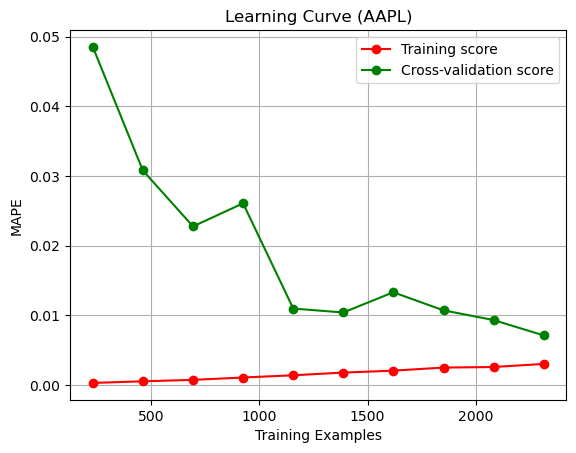

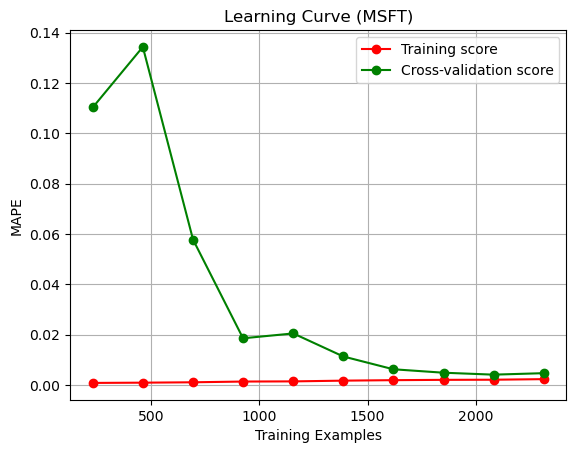

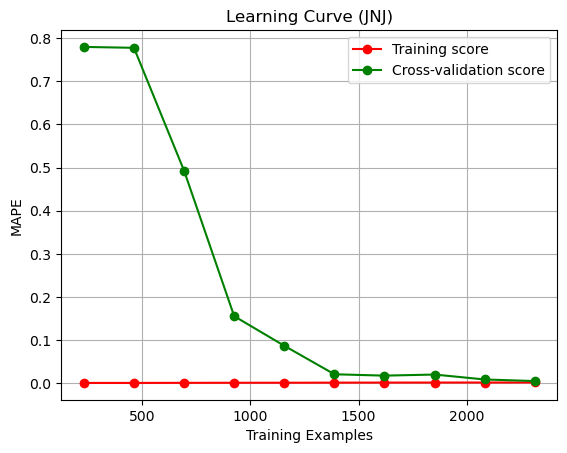

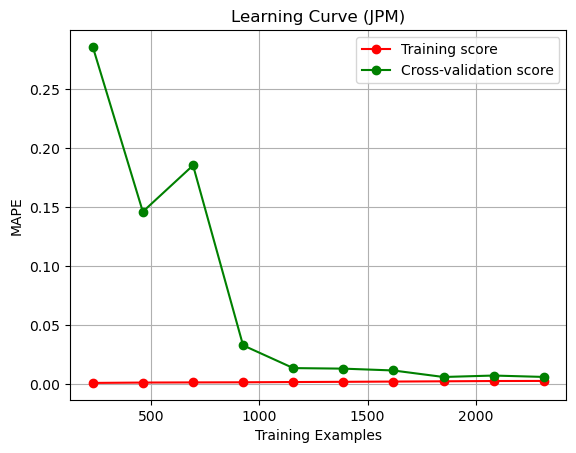

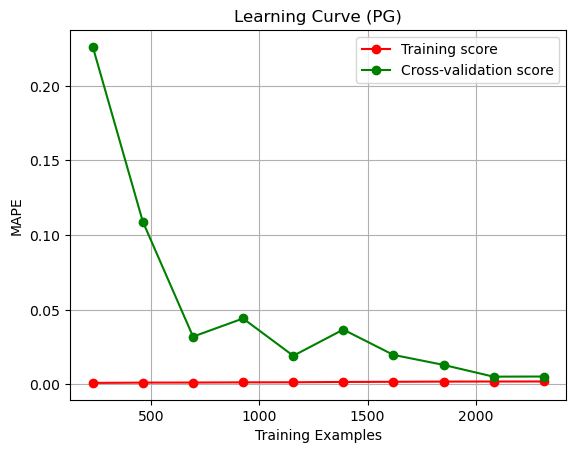

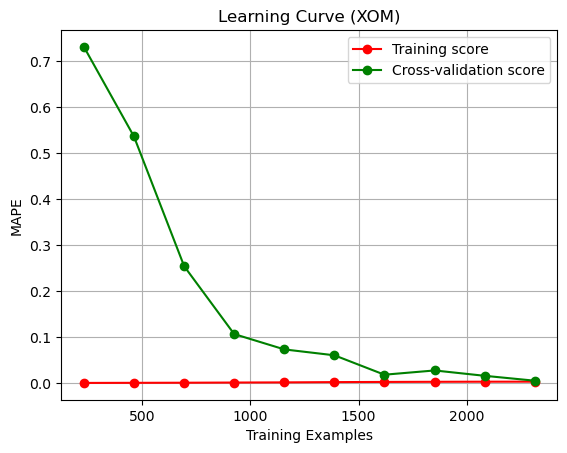

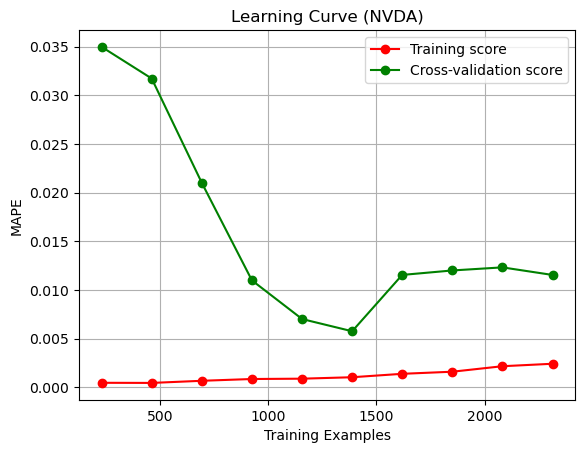

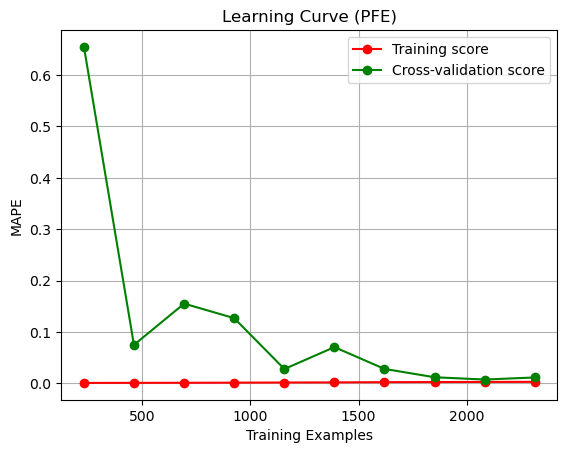

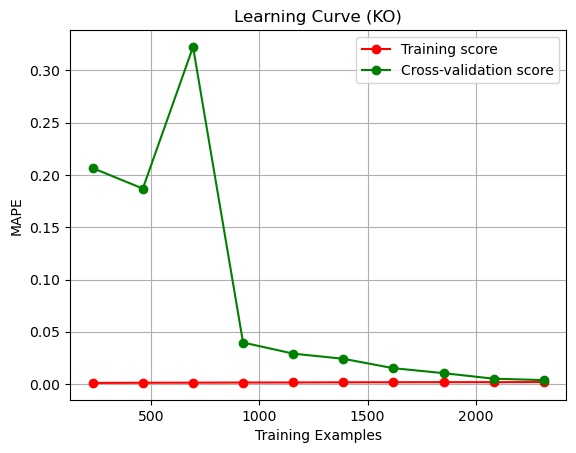

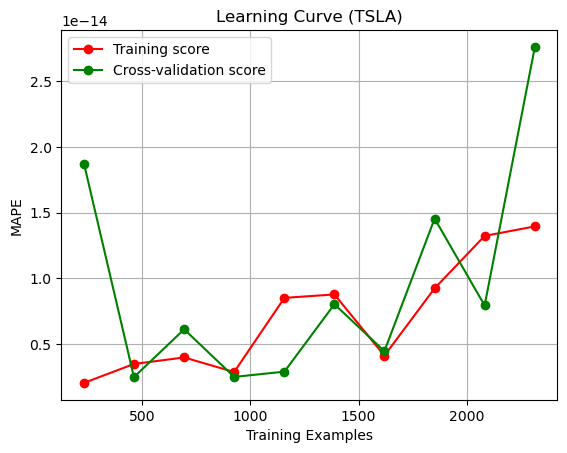

In [20]:
# Apply learning curve and include the stock ticker in the title
for ticker in tickers:
    target_column = f'{ticker}_Close'
    y = combined_data[target_column].values
    X = combined_data.drop(columns=[target_column]).values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    lr_model = LinearRegression()
    plot_learning_curve(lr_model, X_scaled, y, title=ticker)